In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import calendar
from statsmodels.stats.weightstats import zconfint
from statsmodels.distributions.empirical_distribution import ECDF

# Configuración de estilo
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

# Leer los datos de ambas hojas del archivo Excel
santa_ana = pd.read_excel('Grupo_6.xlsx', sheet_name='Santa Ana')
la_floresta = pd.read_excel('Grupo_6.xlsx', sheet_name='La Floresta')

# Añadir columna de tienda y combinar los datos
santa_ana['Tienda'] = 'Santa Ana'
la_floresta['Tienda'] = 'La Floresta'
data = pd.concat([santa_ana, la_floresta], ignore_index=True)

# Convertir fecha a datetime y extraer día de semana y mes
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Dia_Semana'] = data['Fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
data['Mes'] = data['Fecha'].dt.month
data['Dia_Nombre'] = data['Fecha'].dt.day_name()
data['Mes_Nombre'] = data['Fecha'].dt.month_name()

# Mostrar las primeras filas
print("Datos combinados:")
display(data.head())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas por tienda:")
display(data.groupby('Tienda')['Ventas'].describe())

Datos combinados:


,Fecha,Ventas,Tienda,Dia_Semana,Mes,Dia_Nombre,Mes_Nombre
0,2023-01-01,14582.396813,Santa Ana,6,1,Sunday,January
1,2023-01-02,16427.162325,Santa Ana,0,1,Monday,January
2,2023-01-03,18462.233907,Santa Ana,1,1,Tuesday,January
3,2023-01-04,19918.824628,Santa Ana,2,1,Wednesday,January
4,2023-01-05,20618.044486,Santa Ana,3,1,Thursday,January



Estadísticas descriptivas por tienda:


,count,mean,std,min,25%,50%,75%,max
Tienda,,,,,,,,
La Floresta,365.0,18868.916339,3105.287587,10180.815011,16658.104846,18882.139357,21070.589125,26325.905665
Santa Ana,365.0,21946.489516,3052.277181,11832.224680,20022.439799,22026.943380,24134.458346,29210.434938


Distribuciones por mes - Santa Ana


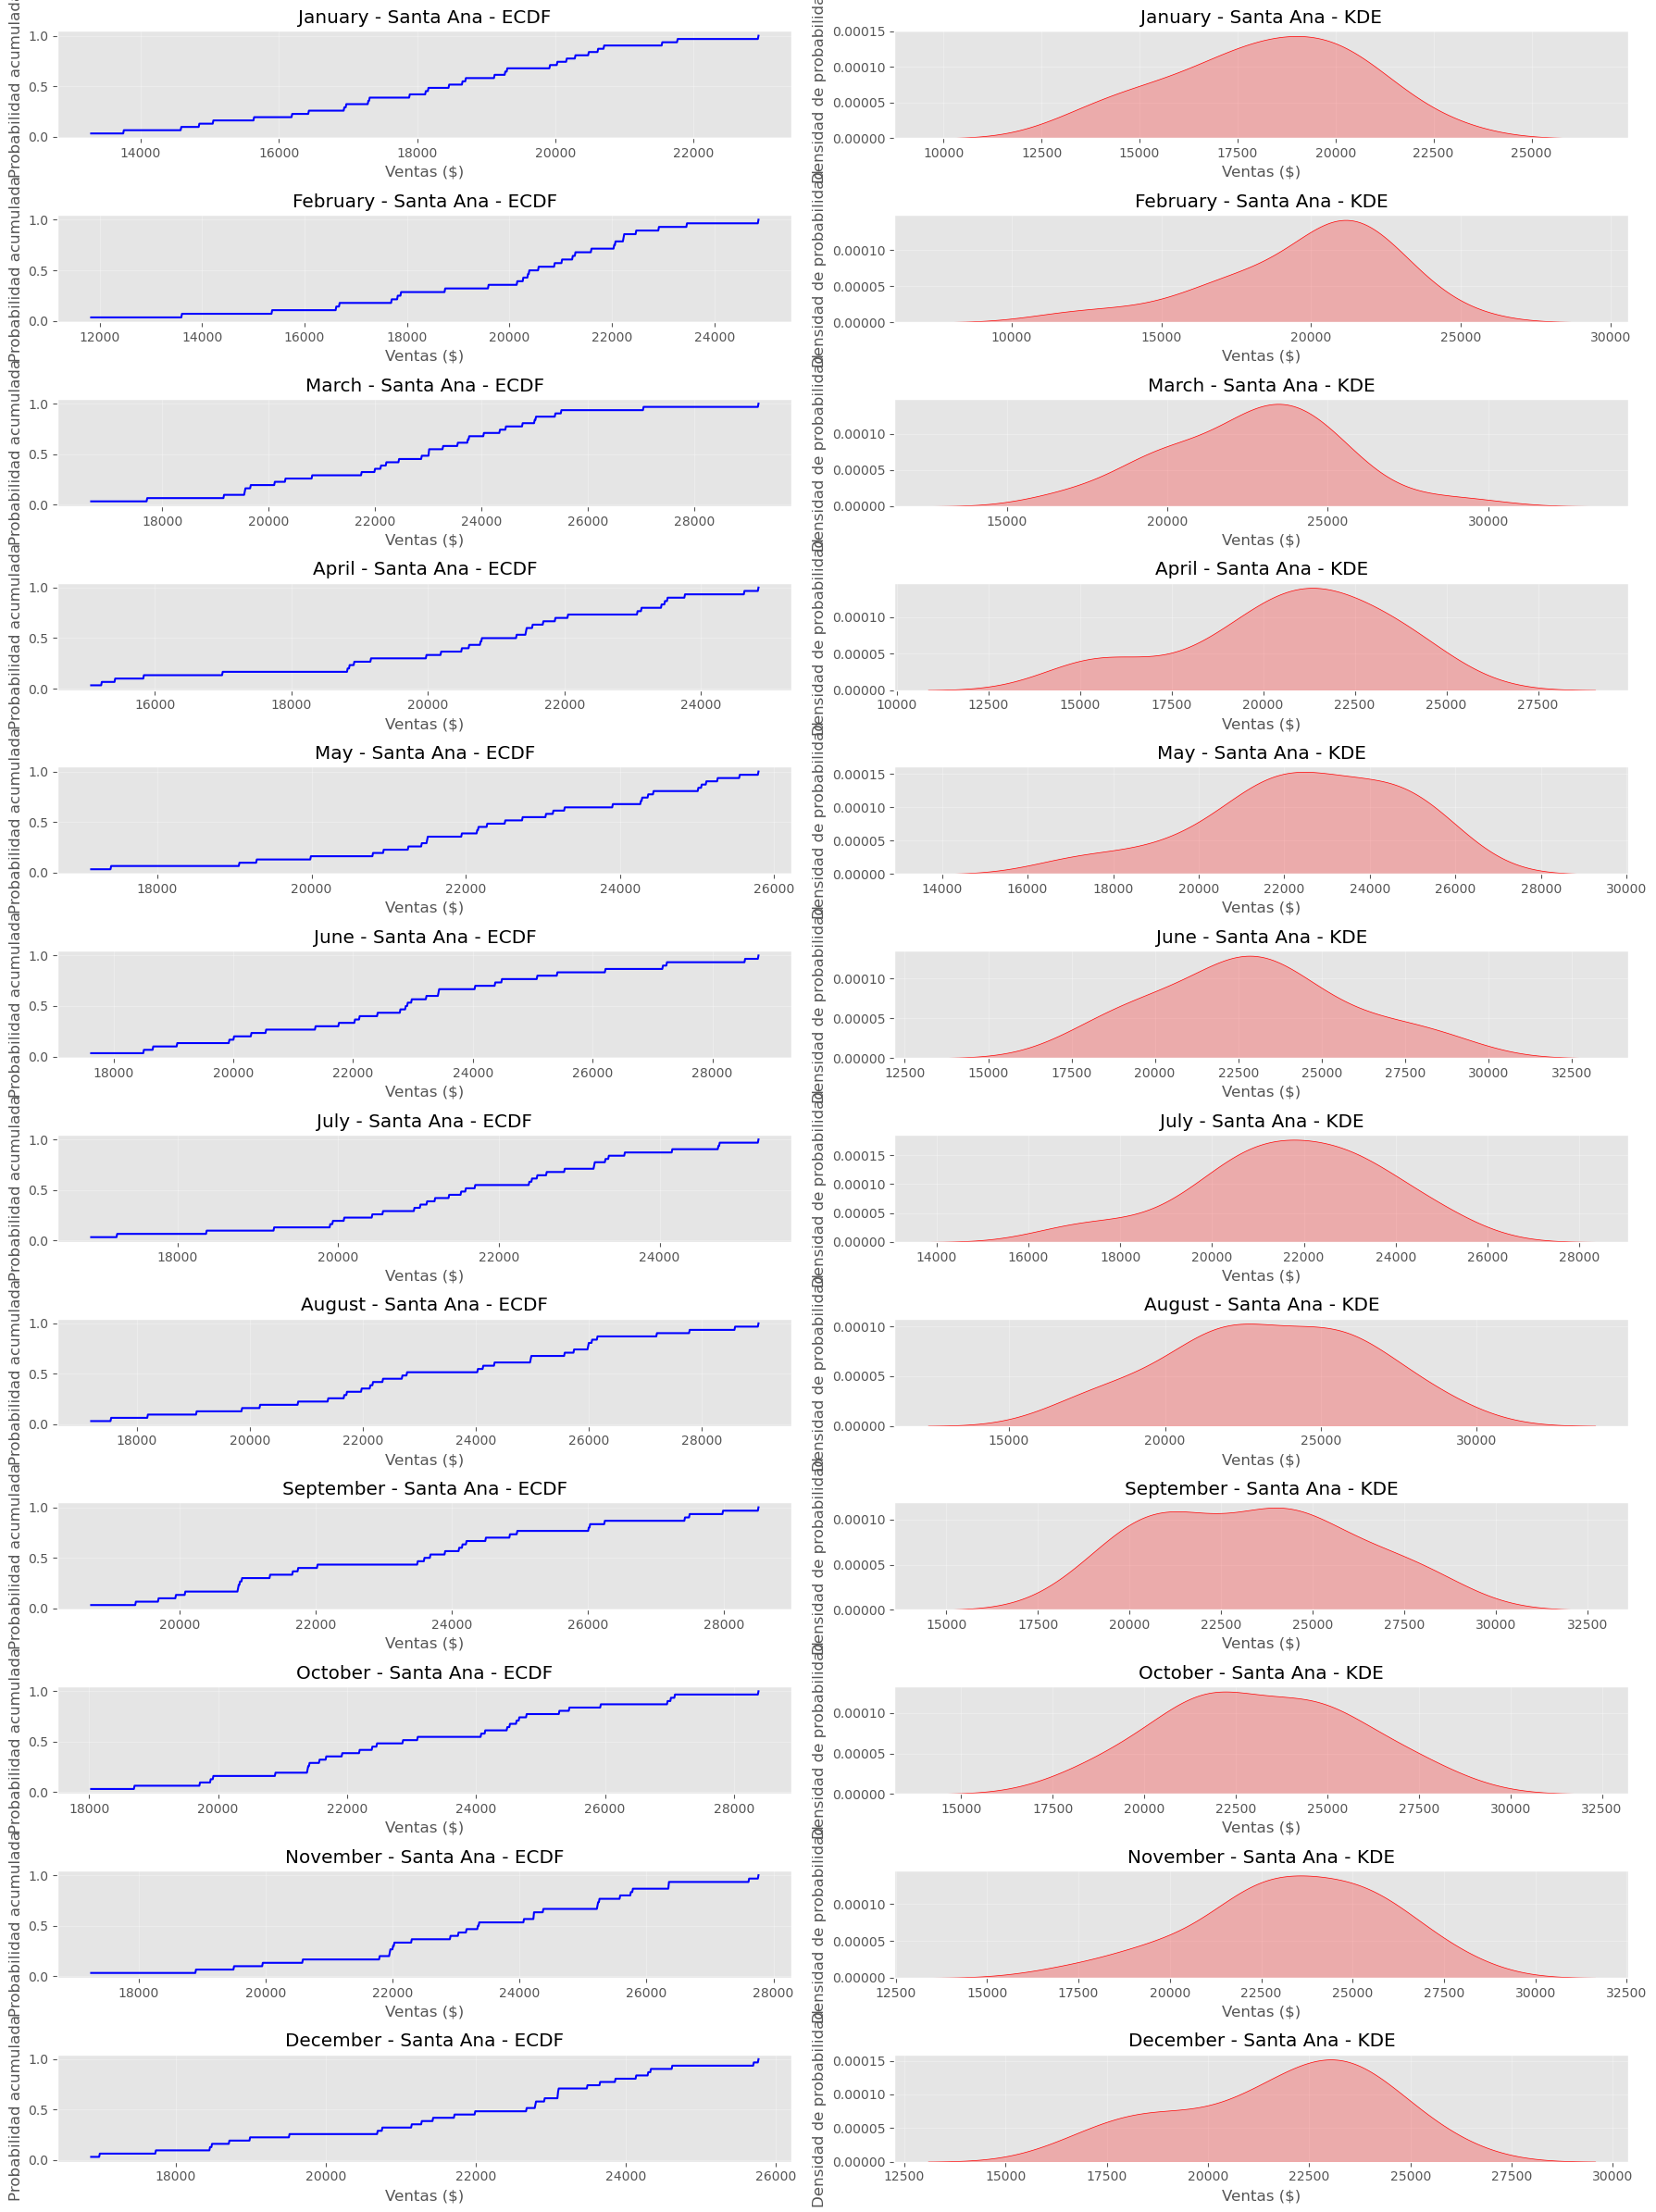


Distribuciones por mes - La Floresta


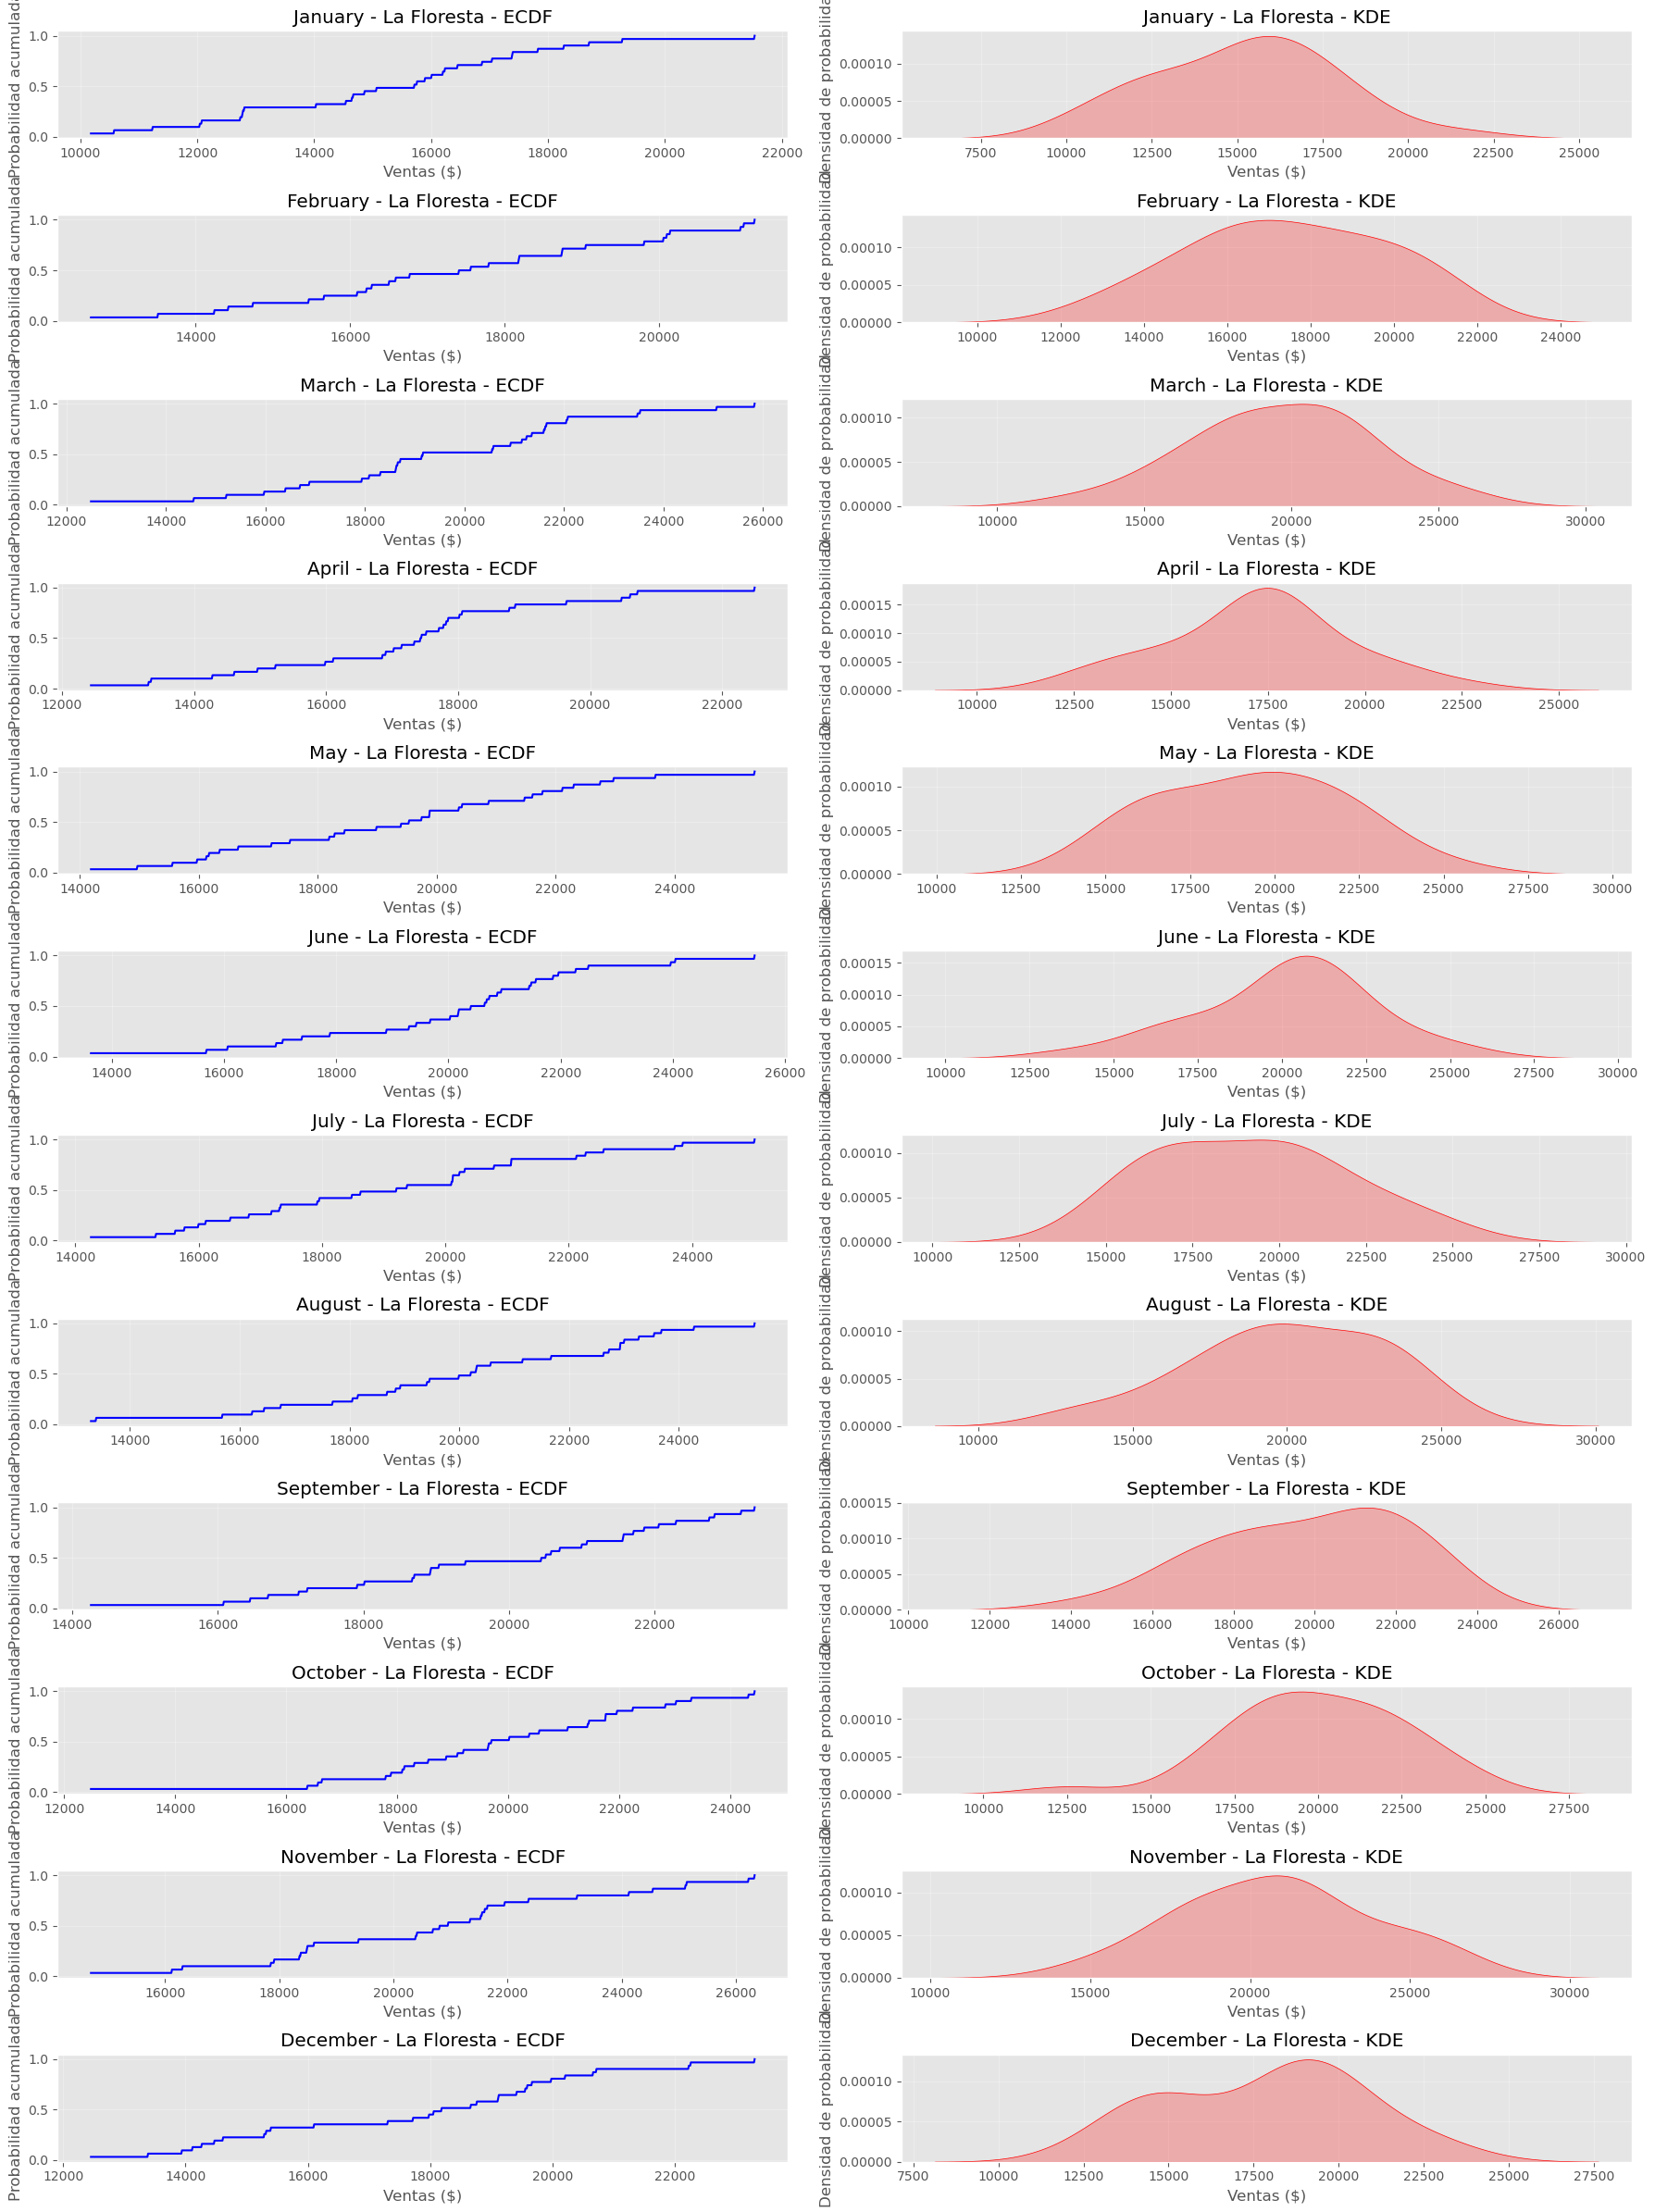

In [9]:
def plot_distributions_by_month(df, store):
    # Filtrar por tienda
    store_data = df[df['Tienda'] == store]
    
    # Crear figura
    plt.figure(figsize=(18, 24))
    
    for month in range(1, 13):
        month_data = store_data[store_data['Mes'] == month]['Ventas']
        month_name = calendar.month_name[month]
        
        # Subplot para ECDF
        plt.subplot(12, 2, 2*month-1)
        ecdf = ECDF(month_data)
        x = np.linspace(month_data.min(), month_data.max(), 1000)
        plt.plot(x, ecdf(x), 'b-', label='ECDF')
        plt.title(f'{month_name} - {store} - ECDF')
        plt.xlabel('Ventas ($)')
        plt.ylabel('Probabilidad acumulada')
        plt.grid(True, alpha=0.3)
        
        # Subplot para KDE
        plt.subplot(12, 2, 2*month)
        sns.kdeplot(month_data, color='r', label='KDE', fill=True)
        plt.title(f'{month_name} - {store} - KDE')
        plt.xlabel('Ventas ($)')
        plt.ylabel('Densidad de probabilidad')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Análisis para Santa Ana
print("Distribuciones por mes - Santa Ana")
plot_distributions_by_month(data, 'Santa Ana')

# Análisis para La Floresta
print("\nDistribuciones por mes - La Floresta")
plot_distributions_by_month(data, 'La Floresta')

In [10]:
def confidence_intervals_by_month(df, store):
    results = []
    store_data = df[df['Tienda'] == store]
    
    for month in range(1, 13):
        month_data = store_data[store_data['Mes'] == month]['Ventas']
        month_name = calendar.month_name[month]
        
        # Intervalo al 95%
        ci_95 = zconfint(month_data, alpha=0.05)
        # Intervalo al 99%
        ci_99 = zconfint(month_data, alpha=0.01)
        
        results.append({
            'Mes': month_name,
            'Media': month_data.mean(),
            'Mediana': month_data.median(),
            'IC_95_inf': ci_95[0],
            'IC_95_sup': ci_95[1],
            'IC_99_inf': ci_99[0],
            'IC_99_sup': ci_99[1]
        })
    
    return pd.DataFrame(results)

# Intervalos para Santa Ana
print("Intervalos de confianza por mes - Santa Ana")
ci_santa_ana = confidence_intervals_by_month(data, 'Santa Ana')
display(ci_santa_ana)

# Intervalos para La Floresta
print("\nIntervalos de confianza por mes - La Floresta")
ci_la_floresta = confidence_intervals_by_month(data, 'La Floresta')
display(ci_la_floresta)

Intervalos de confianza por mes - Santa Ana


,Mes,Media,Mediana,IC_95_inf,IC_95_sup,IC_99_inf,IC_99_sup
0,January,18206.125716,18462.233907,17346.850281,19065.401151,17076.846371,19335.405061
1,February,19848.430608,20471.384625,18734.470571,20962.390644,18384.438958,21312.422257
2,March,22646.048777,23011.054074,21685.858915,23606.238640,21384.145393,23907.952162
3,April,20606.297183,21040.626279,19613.694033,21598.900334,19301.795518,21910.798849
4,May,22468.543099,22509.729575,21660.048548,23277.037651,21406.001147,23531.085052
5,June,22905.975804,22887.292264,21862.042352,23949.909256,21534.014688,24277.936920
6,July,21651.006336,21581.249003,20924.942587,22377.070085,20696.796822,22605.215850
7,August,23296.548798,22776.011238,22179.683022,24413.414574,21828.738360,24764.359236
8,September,23307.408944,23639.231597,22316.955389,24297.862498,22005.732327,24609.085561
9,October,23124.817114,22860.519172,22206.708802,24042.925426,21918.218262,24331.415966



Intervalos de confianza por mes - La Floresta


,Mes,Media,Mediana,IC_95_inf,IC_95_sup,IC_99_inf,IC_99_sup
0,January,15208.568009,15711.580833,14267.473083,16149.662935,13971.759625,16445.376393
1,February,17436.963015,17484.872898,16553.265904,18320.660126,16275.588147,18598.337883
2,March,19613.980971,19154.828138,18537.359738,20690.602204,18199.060828,21028.901114
3,April,17223.320722,17438.274181,16392.017240,18054.624203,16130.802755,18315.838689
4,May,19313.641985,19532.514388,18326.427232,20300.856738,18016.221875,20611.062096
5,June,20102.161228,20517.794487,19171.160668,21033.161787,18878.619090,21325.703365
6,July,19130.602000,19204.787522,18152.976358,20108.227642,17845.784117,20415.419883
7,August,19984.362508,20206.567608,18886.617307,21082.107708,18541.680766,21427.044249
8,September,19825.396876,20469.891743,18975.334627,20675.459125,18708.225710,20942.568042
9,October,19917.239570,19694.163119,18999.478824,20835.000316,18711.097497,21123.381643


Distribuciones por día de semana - Santa Ana


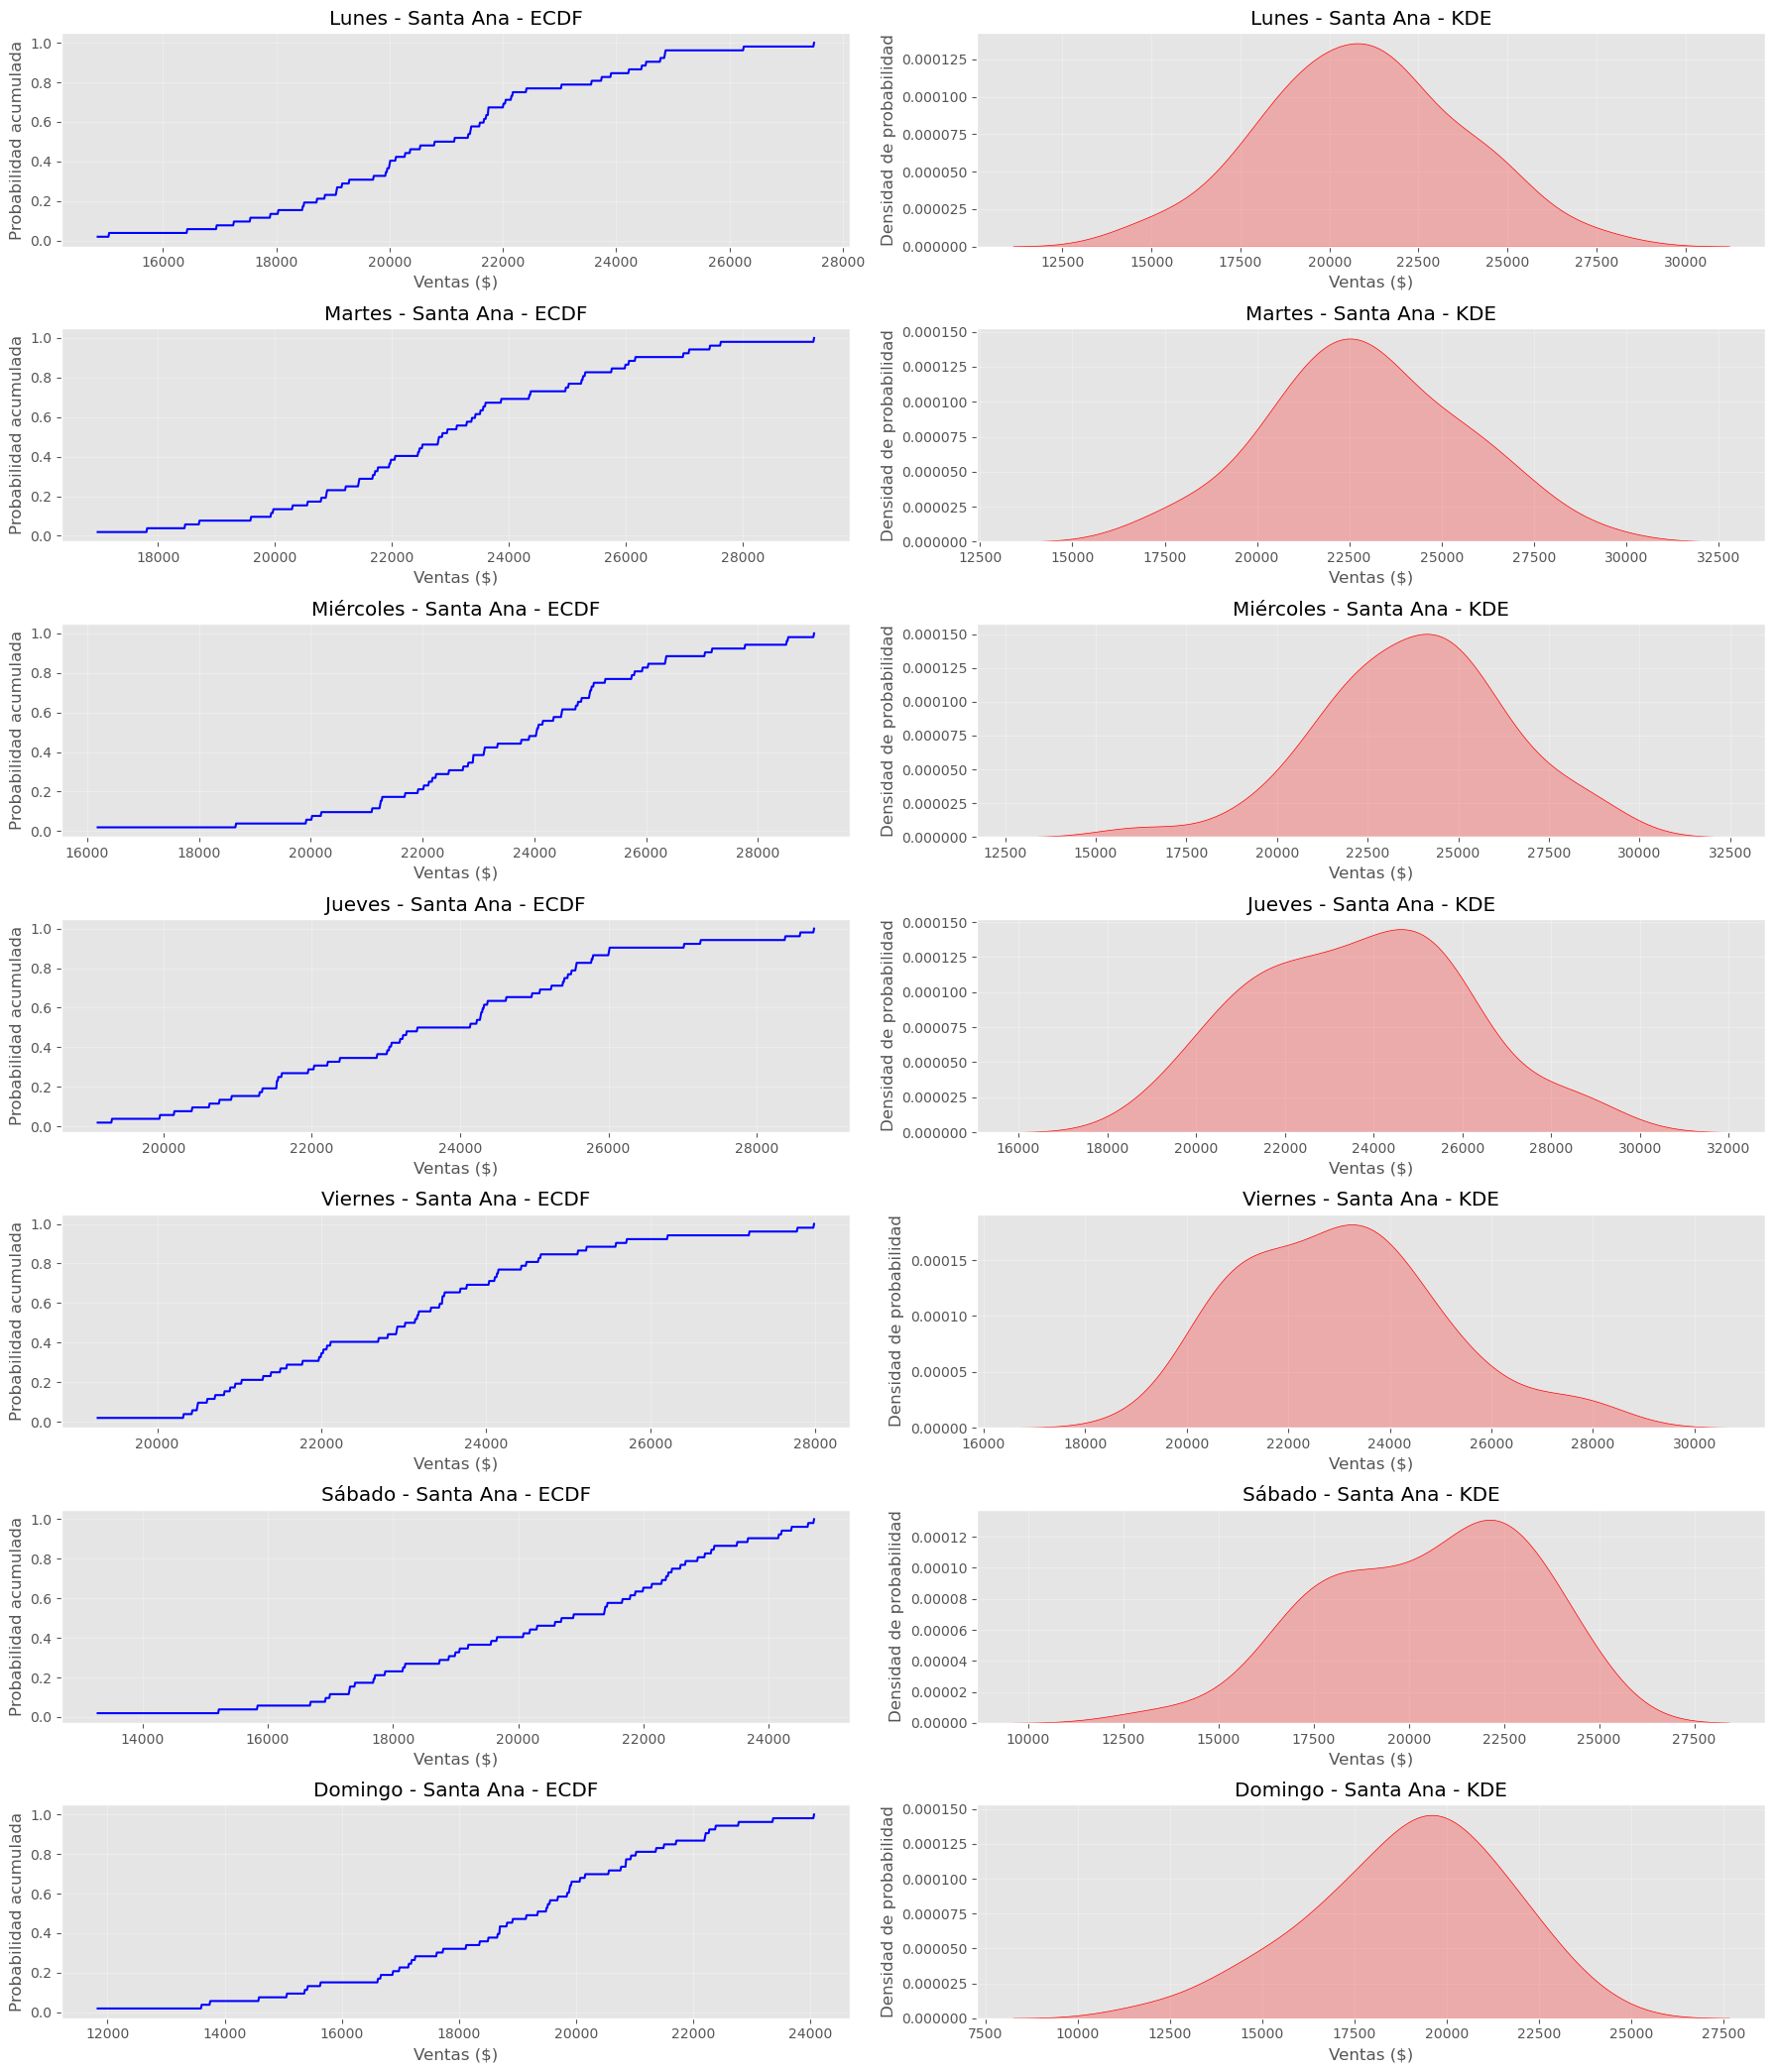


Distribuciones por día de semana - La Floresta


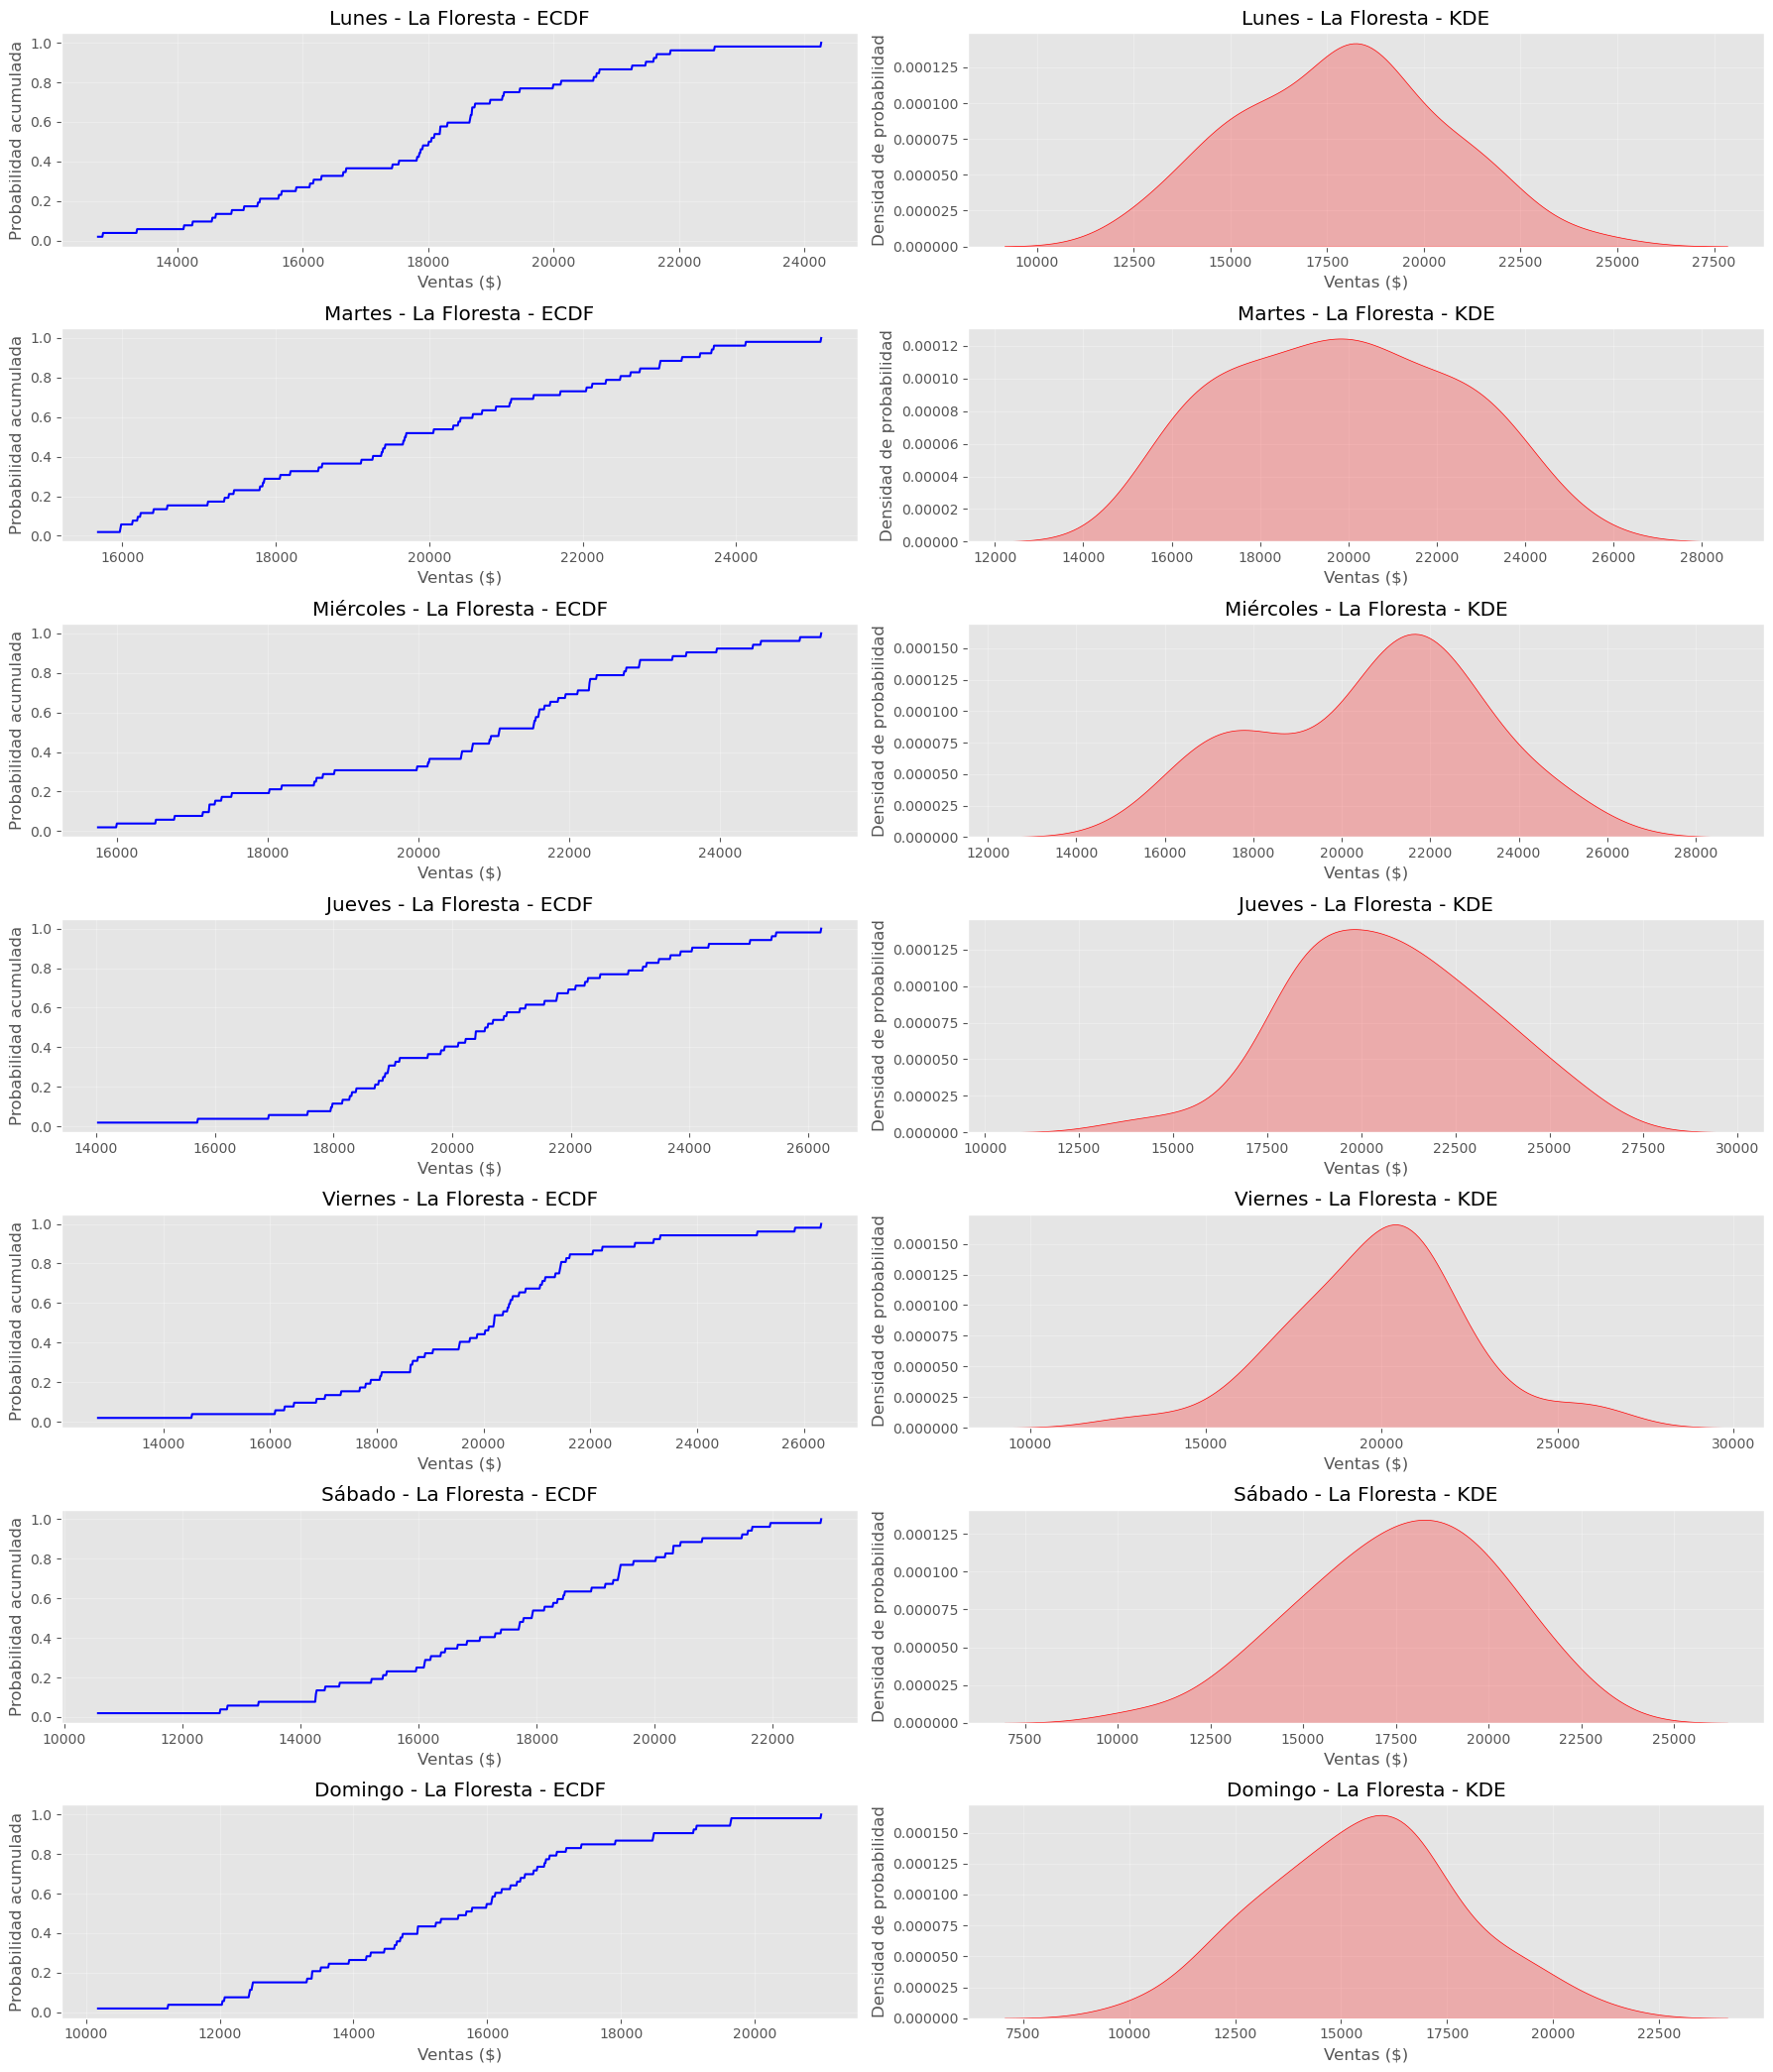

In [11]:
def plot_distributions_by_weekday(df, store):
    # Filtrar por tienda
    store_data = df[df['Tienda'] == store]
    weekday_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    
    # Crear figura
    plt.figure(figsize=(18, 21))
    
    for weekday in range(7):
        weekday_data = store_data[store_data['Dia_Semana'] == weekday]['Ventas']
        
        # Subplot para ECDF
        plt.subplot(7, 2, 2*weekday+1)
        ecdf = ECDF(weekday_data)
        x = np.linspace(weekday_data.min(), weekday_data.max(), 1000)
        plt.plot(x, ecdf(x), 'b-', label='ECDF')
        plt.title(f'{weekday_names[weekday]} - {store} - ECDF')
        plt.xlabel('Ventas ($)')
        plt.ylabel('Probabilidad acumulada')
        plt.grid(True, alpha=0.3)
        
        # Subplot para KDE
        plt.subplot(7, 2, 2*weekday+2)
        sns.kdeplot(weekday_data, color='r', label='KDE', fill=True)
        plt.title(f'{weekday_names[weekday]} - {store} - KDE')
        plt.xlabel('Ventas ($)')
        plt.ylabel('Densidad de probabilidad')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Análisis para Santa Ana
print("Distribuciones por día de semana - Santa Ana")
plot_distributions_by_weekday(data, 'Santa Ana')

# Análisis para La Floresta
print("\nDistribuciones por día de semana - La Floresta")
plot_distributions_by_weekday(data, 'La Floresta')

In [12]:
def confidence_intervals_by_weekday(df, store):
    results = []
    store_data = df[df['Tienda'] == store]
    weekday_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    
    for weekday in range(7):
        weekday_data = store_data[store_data['Dia_Semana'] == weekday]['Ventas']
        
        # Intervalo al 95%
        ci_95 = zconfint(weekday_data, alpha=0.05)
        # Intervalo al 99%
        ci_99 = zconfint(weekday_data, alpha=0.01)
        
        results.append({
            'Dia': weekday_names[weekday],
            'Media': weekday_data.mean(),
            'Mediana': weekday_data.median(),
            'IC_95_inf': ci_95[0],
            'IC_95_sup': ci_95[1],
            'IC_99_inf': ci_99[0],
            'IC_99_sup': ci_99[1]
        })
    
    return pd.DataFrame(results)

# Intervalos para Santa Ana
print("Intervalos de confianza por día - Santa Ana")
ci_weekday_santa = confidence_intervals_by_weekday(data, 'Santa Ana')
display(ci_weekday_santa)

# Intervalos para La Floresta
print("\nIntervalos de confianza por día - La Floresta")
ci_weekday_floresta = confidence_intervals_by_weekday(data, 'La Floresta')
display(ci_weekday_floresta)

Intervalos de confianza por día - Santa Ana


,Dia,Media,Mediana,IC_95_inf,IC_95_sup,IC_99_inf,IC_99_sup
0,Lunes,20901.405033,20967.922700,20155.566297,21647.243768,19921.206781,21881.603285
1,Martes,22945.735857,22829.332091,22230.304436,23661.167278,22005.499590,23885.972123
2,Miércoles,23780.040645,24038.830271,23087.025843,24473.055446,22869.264811,24690.816479
3,Jueves,23651.513720,23776.379791,23004.907672,24298.119768,22801.729326,24501.298114
4,Viernes,23028.131450,23071.913049,22488.997863,23567.265036,22319.589812,23736.673087
5,Sábado,20443.838536,20791.246100,19706.583832,21181.093240,19474.921614,21412.755458
6,Domingo,18932.718508,19350.339751,18221.083973,19644.353043,17997.472195,19867.964820



Intervalos de confianza por día - La Floresta


,Dia,Media,Mediana,IC_95_inf,IC_95_sup,IC_99_inf,IC_99_sup
0,Lunes,17852.941050,18028.790151,17137.925803,18567.956296,16913.251730,18792.630370
1,Martes,19868.607618,19686.765899,19176.472149,20560.743087,18958.987422,20778.227814
2,Miércoles,20666.303249,21067.542637,19991.911249,21340.695249,19780.001925,21552.604574
3,Jueves,20726.404313,20578.919437,20025.206359,21427.602268,19804.873993,21647.934634
4,Viernes,19918.102294,20197.223576,19217.821186,20618.383402,18997.776914,20838.427674
5,Sábado,17624.654597,17852.759254,16899.753737,18349.555457,16671.973378,18577.335815
6,Domingo,15490.373236,15684.499127,14870.337944,16110.408528,14675.508735,16305.237738


In [16]:
from scipy.stats import ttest_ind

def hypothesis_testing(df):
    # Separar datos por tienda
    santa_ana = df[df['Tienda'] == 'Santa Ana']['Ventas']
    la_floresta = df[df['Tienda'] == 'La Floresta']['Ventas']
    
    # Prueba t para muestras independientes
    t_stat, p_value = ttest_ind(santa_ana, la_floresta, equal_var=False)
    
    print("Análisis de diferencia de medias entre supermercados:\n")
    
    print("Descripción del problema:")
    print("Se busca evaluar si existe una diferencia significativa en las ventas diarias promedio entre")
    print("el supermercado 'Santa Ana' y el supermercado 'La Floresta'.")
    print("Planteo de hipótesis:")
    print("- Hipótesis nula (H₀): Las medias de ventas diarias son iguales (μ₁ = μ₂).")
    print("- Hipótesis alternativa (H₁): Las medias de ventas diarias son distintas (μ₁ ≠ μ₂).")
    print("Se utiliza una prueba t de Student para muestras independientes (varianzas desiguales).\n")
    
    print("Resultados de la prueba de hipótesis:")
    print(f"Media Santa Ana: {santa_ana.mean():.2f}")
    print(f"Media La Floresta: {la_floresta.mean():.2f}")
    print(f"Diferencia de medias: {santa_ana.mean() - la_floresta.mean():.2f}")
    print(f"Estadístico t: {t_stat:.4f}")
    print(f"Valor p: {p_value:.10f}")
    
    # Conclusiones con diferentes niveles de significancia
    print("\nConclusión estadística:")
    if p_value < 0.01:
        print("Se rechaza la hipótesis nula con un nivel de confianza del 99%.")
        print("Existe evidencia estadísticamente significativa de que las ventas promedio de ambas tiendas son diferentes.")
    elif p_value < 0.05:
        print("Se rechaza la hipótesis nula con un nivel de confianza del 95%.")
        print("Existe evidencia de que las ventas promedio de las tiendas son diferentes.")
    else:
        print("No se puede rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar que las ventas promedio son distintas.")

# Realizar la prueba
hypothesis_testing(data)


Análisis de diferencia de medias entre supermercados:

Descripción del problema:
Se busca evaluar si existe una diferencia significativa en las ventas diarias promedio entre
el supermercado 'Santa Ana' y el supermercado 'La Floresta'.
Planteo de hipótesis:
- Hipótesis nula (H₀): Las medias de ventas diarias son iguales (μ₁ = μ₂).
- Hipótesis alternativa (H₁): Las medias de ventas diarias son distintas (μ₁ ≠ μ₂).
Se utiliza una prueba t de Student para muestras independientes (varianzas desiguales).

Resultados de la prueba de hipótesis:
Media Santa Ana: 21946.49
Media La Floresta: 18868.92
Diferencia de medias: 3077.57
Estadístico t: 13.5034
Valor p: 0.0000000000

Conclusión estadística:
Se rechaza la hipótesis nula con un nivel de confianza del 99%.
Existe evidencia estadísticamente significativa de que las ventas promedio de ambas tiendas son diferentes.


Ventas promedio por mes:


Tienda,La Floresta,Santa Ana
Mes_Nombre,,
January,15208.568009,18206.125716
February,17436.963015,19848.430608
March,19613.980971,22646.048777
April,17223.320722,20606.297183
May,19313.641985,22468.543099
June,20102.161228,22905.975804
July,19130.602000,21651.006336
August,19984.362508,23296.548798
September,19825.396876,23307.408944


<Figure size 1400x700 with 0 Axes>

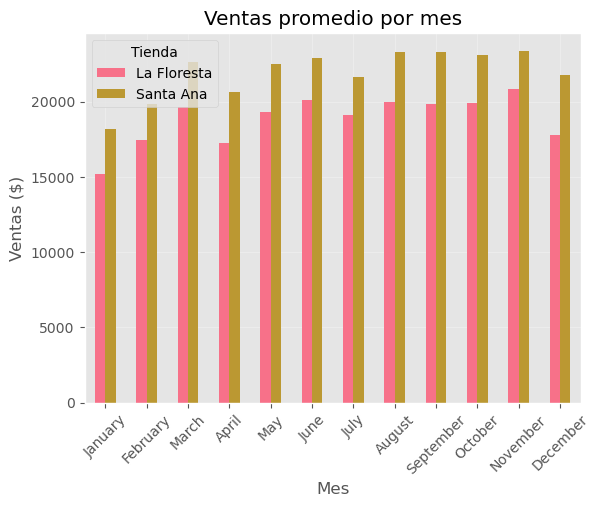

In [14]:
# Resumen de ventas por mes
monthly_sales = data.groupby(['Tienda', 'Mes_Nombre'])['Ventas'].mean().unstack(level=0)
month_order = [calendar.month_name[i] for i in range(1, 13)]
monthly_sales = monthly_sales.loc[month_order]

print("Ventas promedio por mes:")
display(monthly_sales)

# Gráfico comparativo
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='bar')
plt.title('Ventas promedio por mes')
plt.ylabel('Ventas ($)')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

Ventas promedio por día de semana:


Tienda,La Floresta,Santa Ana
Lunes,17852.941050,20901.405033
Martes,19868.607618,22945.735857
Miércoles,20666.303249,23780.040645
Jueves,20726.404313,23651.513720
Viernes,19918.102294,23028.131450
Sábado,17624.654597,20443.838536
Domingo,15490.373236,18932.718508


<Figure size 1400x700 with 0 Axes>

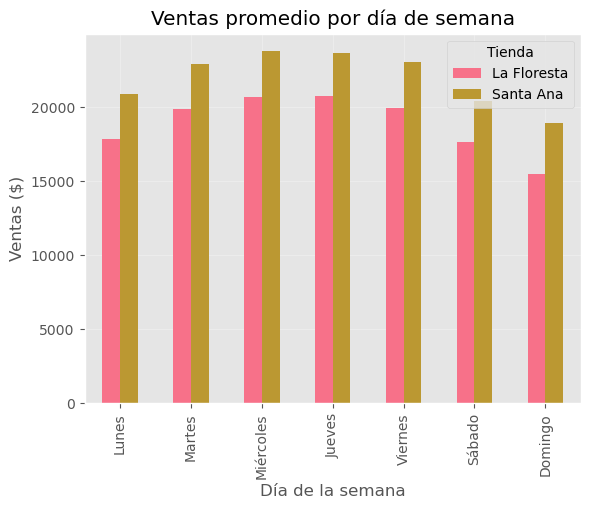

In [15]:
# Resumen de ventas por día de semana
weekday_sales = data.groupby(['Tienda', 'Dia_Nombre'])['Ventas'].mean().unstack(level=0)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.loc[weekday_order]
weekday_sales.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

print("Ventas promedio por día de semana:")
display(weekday_sales)

# Gráfico comparativo
plt.figure(figsize=(14, 7))
weekday_sales.plot(kind='bar')
plt.title('Ventas promedio por día de semana')
plt.ylabel('Ventas ($)')
plt.xlabel('Día de la semana')
plt.grid(True, alpha=0.3)
plt.show()